In [3]:
import itertools
import pickle #using Python 3.6.3
from IPython.display import display, HTML
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
import pandas as pd
import matplotlib.pyplot as plt
#---------------------
# Are You The One? Code
# Calculates the likelihoods of each couple being a perfect match (assuming all matches are equally likely)
# Each week, update the weeks choices and number of matches (as well as the allWeeks list!).
# Each week, update the truth booth information
#--------------------

In [4]:
# Specifies whether the matches should be loaded from the match file
# For the first few times you run, make sure this is set to False.
# Then you can change it to True in order to run faster.
load_from_file = False #keep as True if you have the latest allmatches.p file!

# guys and girls in alphabetical order
guys = ['Anthony', 'Clinton', 'Dimitri', 'Ethan', 'Joe', 'Kareem', 'Keith', 'Melcam', 'Michael', 'Shad', 'Tyler']
girls = ['Alexis', 'Alivia', 'Audrey', 'Diandra', 'Geles', 'Jada', 'Keyana', 'Nichole', 'Nurys', 'Uche', 'Zoe']

# (guesses, number of matches)
# Corresponds to the guys list. ie: in week1, "Francesca" was therfore with "Asaf"
week1 = (['Geles','Uche','Diandra','Jada','Zoe','Alivia','Alexis','Nurys','Keyana','Audrey','Nichole'],3)
# week2 = (['Diandra','Uche','Nichole','Jada','Audrey','Alivia','Alexis','Nurys','Keyana','Geles','Zoe'],1)
# week3 = (['Jada','Uche','Nurys','Alexis','Zoe','Alivia','Diandra','Geles','Audrey','Keyana','Nichole'],2)
# week4 = (['Keyana','Uche','Alexis','Nichole','Zoe','Diandra','Nurys','Alivia','Geles','Audrey','Jada'],3)
# week5 = (['Nichole','Jada','Uche','Geles','Zoe','Alivia','Alexis','Diandra','Nurys','Audrey','Keyana'],1)
# week6 = (['Keyana','Geles','Diandra','Jada','Alexis','Nurys','Zoe','Alivia','Uche','Audrey','Nichole'],4)
# week7 = (['Keyana','Geles','Diandra','Zoe','Uche','Nurys','Jada','Alexis','Audrey','Alivia','Nichole'],5) #ep9
# week8 = (['Alivia','Geles','Diandra','Alexis','Jada','Nurys','Audrey','Uche','Keyana','Zoe','Nichole'],3) #ep10


In [5]:
#currentWeek stores the current weeks guesses, but before any Beams have been lit
# This is used for blackout odds and beaem probabilities.
# Don't worry about it if you just want to see the wiki table
# Use Instruction: if it is currently Week 4, put the current guesses in currentWeek (before the number of Beams have been revealed and run the code without including Week4 in the AllWeeks list
# Ignore these probabilities once you've added the week's beam results to the allWeeks list.
currentWeek = ['Geles','Uche','Diandra','Jada','Zoe','Alivia','Alexis','Nurys','Keyana','Audrey','Nichole']
#UPDATE THIS EVERY WEEK
# list of every weeks guesses
allWeeks = [week1]
# allWeeks = [week1, week2, week3, week4, week5, week6, week7, week8]

# the matches that got denied in the truth booth ("guy name", "girl name")
truthBooth_denied = [("Ethan", "Keyana")]
# truthBooth_denied = [("Ethan", "Keyana"),("Anthony", "Geles"),("Melcam", "Nurys"), 
#                      ("Dimitri","Nichole"),("Clinton","Uche"),("Keith","Alexis"),
#                      ("Keith","Alivia"),("Michael","Audrey")]

# the matches that were confirmed in the truth booth
truthBooth_confirmed = []

In [6]:
# returns the number of matches in common between two match lists
def correlation(list1, list2):
    total = 0
    for i in range(len(list1)):
        if list1[i] == list2[i]:
            total = total + 1
    return total

# returns whether a matchlist breaks a rule
def isImpossible(matchlist):
    for match in truthBooth_denied:
        if (matchlist[guys.index(match[0])] == match[1]):
            return True
    for match in truthBooth_confirmed:
        if (matchlist[guys.index(match[0])] != match[1]):
            return True
    for week in allWeeks:
        if correlation(matchlist, week[0]) != week[1]:
            return True        
    return False           

#list of possible matches
possible = []

if load_from_file: #load matches if previously stored
    iterable = pickle.load( open("allmatches.p", "rb") )
else: #generate all possible matches
    iterable = itertools.permutations(girls,len(girls))
for matching in iterable:
    # skip match lists that break a rule
    if isImpossible(matching):
        continue
    else:
        possible.append(matching)
        
print("There are " + str(len(possible)) + " possible matchings!")

def printRemaining():
    for matching in possible:
        printString = ""
        for i in range(len(matching)):
            printString = printString + ("("+guys[i]+", " + matching[i]+ ")")
        print(printString)
        print("")

#Determine how many couples are the same between 2 matchings
#Oops, just realized this is the same function as 'correlation'
def couplesInCommon(matching1, matching2):
    count = 0
    for i in range(0, len(matching1)):
        if matching2[i] == matching1[i]:
            count = count + 1
    return count

def makePercent(n):
    return (float(n) / len(possible))*100

#Determine the odds of a blackout
# What percent of remaining possible matchings contain 0 of this week's couples?
beamDistribution = [0] * (len(girls)+1)
for matching in possible:
    commonCount = couplesInCommon(matching, currentWeek)
    beamDistribution[commonCount] = beamDistribution[commonCount] + 1

mostLikelyBeamCount = 0
maxBeamCount = 0
highestBeamIndex = 0
lowestBeamIndex = 0
for i in range(0, len(beamDistribution)):
    beamCount = beamDistribution[i]
    if beamCount != 0:
        highestBeamIndex = i
    if beamCount > maxBeamCount:
        maxBeamCount = beamCount
        mostLikelyBeamCount = i
for i in range(0, len(beamDistribution)-1):
    beamCount = beamDistribution[i]
    if beamCount != 0:
        lowestBeamIndex = i
        break

#excludes truth booth perfect matches
blackOutPercent = makePercent(beamDistribution[len(truthBooth_confirmed)])


#Beam Distribution Percentages
distString = ''
for i in range(0, len(beamDistribution)):
    distString = distString + ', '+ str(makePercent(beamDistribution[i]))[:str(makePercent(beamDistribution[i])).index('.')]+'%'

#Print tweet format
print('Beam Probabilities: [' + distString[2:] + ']')
print('Most likely Beam Count: ' + str(mostLikelyBeamCount))
#print('Max Beam Count: ' + str(highestBeamIndex))
print('Blackout Odds: ' + str(blackOutPercent)+'%')
print('#AYTO  @AREUTHE1')

print('')
    


There are 2269449 possible matchings!
Beam Probabilities: [0%, 0%, 0%, 100%, 0%, 0%, 0%, 0%, 0%, 0%, 0%, 0%]
Most likely Beam Count: 3
Blackout Odds: 0.0%
#AYTO  @AREUTHE1



In [7]:
# initialize dictionary
match_dictionary = {}
for guy in guys:
    match_dictionary[guy] = [0] * len(girls)

# fill in dictionary
for matching in possible:
    for guy in guys:
        match_dictionary[guy][girls.index(matching[guys.index(guy)])] += float(1)/len(possible)

#determine best matching__RC
def determineBestMatching():
    best_match_score = 0
    best_matching = []
    for matching in possible:
        score = 0
        for guy in guys:
            score += match_dictionary[guy][girls.index(matching[guys.index(guy)])]
        #print("score " + str(score))
        if score > best_match_score:
            best_match_score = score
            best_matching = matching
    print("Best score " + str(best_match_score))
    match = {guys[i]: best_matching[i] for i in range(len(best_matching))}

    best=pd.DataFrame(list(match.items()),columns = ['Guys','Girls'])
    
    return best

#print all remaining scores
def printAllScores():
    for matching in possible:
        score = 0
        for guy in guys:
            score += match_dictionary[guy][girls.index(matching[guys.index(guy)])]
        print("Score " + str(score))
        printString = ""
        for i in range(len(matching)):
            printString = printString + ("("+guys[i]+", " + matching[i]+ ")")
        print(printString)
        print("")

# prints the percent of possible matchings that contain each couple
def printAll():
    for key in sorted(match_dictionary.keys()):
        print(key.upper())
        matchPercents = ""
        for i in range(len(match_dictionary[key])):
            matchPercents += " " + str(girls[i]) + " " + "%.1f%%" % (100*match_dictionary[key][i])
        print(matchPercents)

#prints the top match for each guy
def printMaxGuys():
    for key in sorted(match_dictionary.keys()):
        print(key.upper())
        matchPercents = ""
        maxPercent = 0
        maxIndex = 0
        for i in range(len(match_dictionary[key])):
            percent = match_dictionary[key][i]
            if percent > maxPercent:
                maxPercent = percent
                maxIndex = i
        
        matchPercents += " " + str(girls[maxIndex]) + " " + "%.1f%%" % (100*match_dictionary[key][maxIndex])
        print(matchPercents)

#prints the top match for each girl
def printMaxGirls():
    for i in range(len(guys)):
        print(girls[i].upper())
        maxPercent = 0
        maxIndex = 0
        matchPercents = ""
        for key in sorted(match_dictionary.keys()):
            percent = match_dictionary[key][i]
            if percent > maxPercent:
                maxPercent = percent
                maxIndex = key

        matchPercents += " " + str(maxIndex) + " " + "%.1f%%" % (100*match_dictionary[maxIndex][i])
        print(matchPercents)




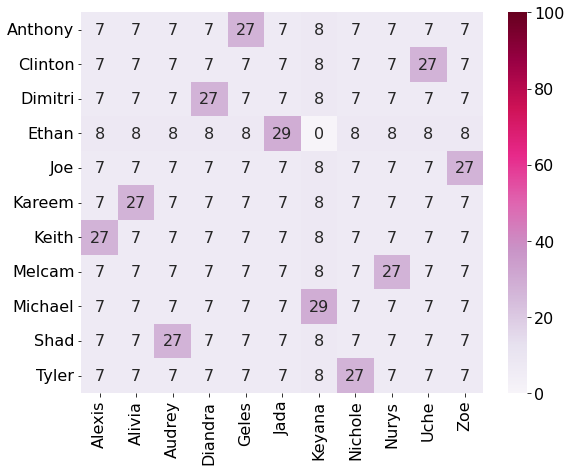

In [8]:
def printTable():
    df=pd.DataFrame.from_dict(match_dictionary, columns=girls,orient='index')
    df=df*100
    pd.set_option('precision', 0)
    df=df.round(0)
    fig = plt.figure(figsize=(9,7))
    plt.rcParams['font.size'] = '16'
#     cmap=sns.diverging_palette(200,10,sep=30, n=7, as_cmap=True)
    sns.heatmap(data=df, annot = True, cmap='PuRd', vmax=100, vmin=0,fmt='g')

printTable()

if not load_from_file: #save matches into a file
    pickle.dump(possible, open("allmatches.p", "wb"))

In [184]:
determineBestMatching()

Best score 11.0


,Guys,Girls
0,Anthony,Alexis
1,Clinton,Geles
2,Dimitri,Nurys
3,Ethan,Zoe
4,Joe,Uche
5,Kareem,Diandra
6,Keith,Jada
7,Melcam,Alivia
8,Michael,Keyana
9,Shad,Audrey
